# Exam

Sound: https://freesound.org/people/juskiddink/sounds/60055/

In [3]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.signal import get_window
sys.path.append('../software/models/')
import stft

## Make plots wider
plt.rcParams["figure.figsize"] = [14,7]


from utilFunctions import wavread, wavwrite

## Part 1

../software/models/utilFunctions.py:52: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = read(filename)


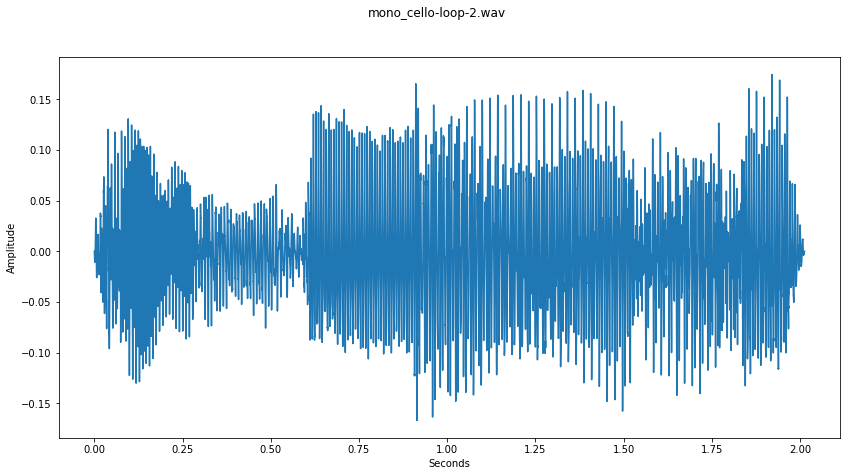

In [4]:
file = '../sounds/mono_cello-loop-2.wav'
fs, x = wavread(file)

time_x = np.arange(x.size)/float(fs)

ipd.display(ipd.Audio(data=x, rate=fs))
plt.plot(time_x, x)
plt.suptitle('mono_cello-loop-2.wav')
plt.xlabel("Seconds")
plt.ylabel("Amplitude")

plt.show()


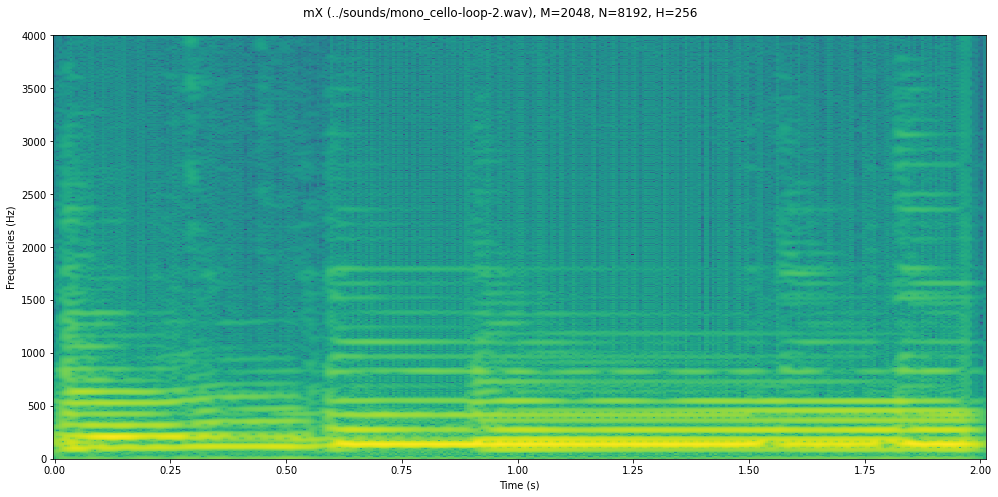

In [17]:
#%matplotlib notebook
window = 'hamming'
M = 2048
N = 4096 * 2
H = 128 *2
w = get_window(window, M) 
    
xmX, pmX = stft.stftAnal(x, w, N , H)

numFrames = int(xmX[:,0].size)
frmTime = H*np.arange(numFrames)/float(fs)
binFreq = np.arange(N/2+1)*float(fs)/N

plt.ylim([0, 4000])
plt.suptitle('mX (%s), M=%d, N=%d, H=%d' % (file, M, N, H))
plt.xlabel("Time (s)")
plt.ylabel("Frequencies (Hz)")
plt.tight_layout()

plt.pcolormesh(frmTime, binFreq, np.transpose(xmX), shading='auto')
plt.show()

### Explanation Part 1

## Part 2 (c)